# Unsupervised Learning Project

Objective is to group economies together that share similarities in economic freedom.

#### Importing libraries:

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("economic_freedom_index2019_data - economic_freedom_index2019_data.csv")
df.head()

CountryID Country Name      WEBNAME                        Region  \
0          1  Afghanistan  Afghanistan                  Asia-Pacific   
1          2      Albania      Albania                        Europe   
2          3      Algeria      Algeria  Middle East and North Africa   
3          4       Angola       Angola            Sub-Saharan Africa   
4          5    Argentina    Argentina                      Americas   

   World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  ...      Country  \
0                   29.6                  25.2  ...  Afghanistan   
1                   30.6                  40.4  ...      Albania   
2                   36.2                  28.9  ...      Algeria   
3                   26.6                  20.5  ...       Angola   
4                   44.5                  33.5  ...    Argentina   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   35.5               $69.60                  2.5   
1                    2.9               $36.00                  3.9   
2                   41.5              $632.90                  2.0   
3                   28.2              $190.30                  0.7   
4                   44.1              $920.20                  2.9   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         2.9                $1,958               8.8   
1                         2.5               $12,507              13.9   
2                         3.1               $15,237                10   
3                         2.9                $6,753               8.2   
4                         0.7               $20,876               8.7   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            5.0                   53.9                     7.3  
1            2.0               1,119.10                    71.2  
2            5.6               1,203.00                    25.8  
3           31.7              -2,254.50                    65.3  
4           25.7              11,857.00                    52.6  

[5 rows x 34 columns]

#### Univariate analysis:

In [3]:
df.dtypes

CountryID                       int64
Country Name                   object
WEBNAME                        object
Region                         object
World Rank                    float64
Region Rank                   float64
2019 Score                    float64
Property Rights               float64
Judical Effectiveness         float64
Government Integrity          float64
Tax Burden                    float64
Gov't Spending                float64
Fiscal Health                 float64
Business Freedom              float64
Labor Freedom                 float64
Monetary Freedom              float64
Trade Freedom                 float64
Investment Freedom            float64
Financial Freedom             float64
Tariff Rate (%)               float64
Income Tax Rate (%)           float64
Corporate Tax Rate (%)        float64
Tax Burden % of GDP           float64
Gov't Expenditure % of GDP    float64
Country                        object
Population (Millions)          object
GDP (Billion

In [4]:
df0 = df.drop(columns= ['CountryID', 'WEBNAME', 'Country', 'Country Name', 'Region'])
df0.head()

World Rank  Region Rank  2019 Score  Property Rights  \
0       152.0         39.0        51.5             19.6   
1        52.0         27.0        66.5             54.8   
2       171.0         14.0        46.2             31.6   
3       156.0         33.0        50.6             35.9   
4       148.0         26.0        52.2             47.8   

   Judical Effectiveness  Government Integrity  Tax Burden  Gov't Spending  \
0                   29.6                  25.2        91.7            80.3   
1                   30.6                  40.4        86.3            73.9   
2                   36.2                  28.9        76.4            48.7   
3                   26.6                  20.5        83.9            80.7   
4                   44.5                  33.5        69.3            49.5   

   Fiscal Health  Business Freedom  ...  Gov't Expenditure % of GDP  \
0           99.3              49.2  ...                        25.6   
1           80.6              69.3  ...                        29.5   
2           18.7              61.6  ...                        41.4   
3           58.2              55.7  ...                        25.3   
4           33.0              56.4  ...                        41.0   

   Population (Millions)  GDP (Billions, PPP)  GDP Growth Rate (%)  \
0                   35.5               $69.60                  2.5   
1                    2.9               $36.00                  3.9   
2                   41.5              $632.90                  2.0   
3                   28.2              $190.30                  0.7   
4                   44.1              $920.20                  2.9   

   5 Year GDP Growth Rate (%)  GDP per Capita (PPP)  Unemployment (%)  \
0                         2.9                $1,958               8.8   
1                         2.5               $12,507              13.9   
2                         3.1               $15,237                10   
3                         2.9                $6,753               8.2   
4                         0.7               $20,876               8.7   

   Inflation (%)  FDI Inflow (Millions)  Public Debt (% of GDP)  
0            5.0                   53.9                     7.3  
1            2.0               1,119.10                    71.2  
2            5.6               1,203.00                    25.8  
3           31.7              -2,254.50                    65.3  
4           25.7              11,857.00                    52.6  

[5 rows x 29 columns]

In [5]:
df0.isna().sum()

World Rank                    6
Region Rank                   6
2019 Score                    6
Property Rights               1
Judical Effectiveness         1
Government Integrity          1
Tax Burden                    6
Gov't Spending                3
Fiscal Health                 3
Business Freedom              1
Labor Freedom                 2
Monetary Freedom              2
Trade Freedom                 4
Investment Freedom            2
Financial Freedom             5
Tariff Rate (%)               4
Income Tax Rate (%)           3
Corporate Tax Rate (%)        3
Tax Burden % of GDP           7
Gov't Expenditure % of GDP    4
Population (Millions)         0
GDP (Billions, PPP)           1
GDP Growth Rate (%)           2
5 Year GDP Growth Rate (%)    3
GDP per Capita (PPP)          2
Unemployment (%)              5
Inflation (%)                 4
FDI Inflow (Millions)         5
Public Debt (% of GDP)        4
dtype: int64

In [6]:
df1 = df0.dropna()

In [7]:
df2 = df1.rename(columns={"GDP (Billions, PPP)": "GDP", "GDP per Capita (PPP)": "GDPPerCapita"})

In [8]:
GDPcolumns = df2.columns
df2[GDPcolumns] = df2[GDPcolumns].replace({'\$':''}, regex = True)

In [9]:
df2['Population (Millions)'] = pd.to_numeric(df2['Population (Millions)'],errors='coerce')
df2['GDP'] = pd.to_numeric(df2['GDP'],errors='coerce')
df2['Unemployment (%)'] = pd.to_numeric(df2['Unemployment (%)'],errors='coerce')
df2['FDI Inflow (Millions)'] = pd.to_numeric(df2['FDI Inflow (Millions)'],errors='coerce')
df2['GDPPerCapita'] = pd.to_numeric(df2['GDPPerCapita'],errors='coerce')

In [10]:
df2.dtypes

World Rank                    float64
Region Rank                   float64
2019 Score                    float64
Property Rights               float64
Judical Effectiveness         float64
Government Integrity          float64
Tax Burden                    float64
Gov't Spending                float64
Fiscal Health                 float64
Business Freedom              float64
Labor Freedom                 float64
Monetary Freedom              float64
Trade Freedom                 float64
Investment Freedom            float64
Financial Freedom             float64
Tariff Rate (%)               float64
Income Tax Rate (%)           float64
Corporate Tax Rate (%)        float64
Tax Burden % of GDP           float64
Gov't Expenditure % of GDP    float64
Population (Millions)         float64
GDP                           float64
GDP Growth Rate (%)           float64
5 Year GDP Growth Rate (%)    float64
GDPPerCapita                  float64
Unemployment (%)              float64
Inflation (%

In [11]:
df2.shape

(173, 29)

In [12]:
df2.describe().transpose()

count        mean         std    min      25%  \
World Rank                  173.0   89.046243   51.636567    1.0   44.000   
Region Rank                 173.0   20.219653   12.623265    1.0    9.000   
2019 Score                  173.0   61.349133   10.290731   25.9   54.600   
Property Rights             173.0   53.561850   19.229243    7.6   37.400   
Judical Effectiveness       173.0   46.045087   17.651070   12.3   32.300   
Government Integrity        173.0   42.284393   19.925058    7.9   28.100   
Tax Burden                  173.0   77.704046   11.786874   42.0   71.000   
Gov't Spending              173.0   66.019075   20.957233    0.9   54.100   
Fiscal Health               173.0   66.811561   30.813333    0.0   42.500   
Business Freedom            173.0   64.722543   14.770800   17.7   55.800   
Labor Freedom               173.0   60.051445   13.778284   20.0   51.100   
Monetary Freedom            173.0   75.682659    9.501612    0.0   72.400   
Trade Freedom               173.0   75.022543   10.825901   45.0   67.400   
Investment Freedom          173.0   58.583815   21.408001    0.0   45.000   
Financial Freedom           173.0   49.653179   18.921378   10.0   40.000   
Tariff Rate (%)             173.0    5.623699    4.408220    0.0    2.000   
Income Tax Rate (%)         173.0   28.604046   13.235103    0.0   20.000   
Corporate Tax Rate (%)      173.0   23.916763    8.878332    0.0   20.000   
Tax Burden % of GDP         173.0   22.045665   10.151558    1.6   14.000   
Gov't Expenditure % of GDP  173.0   32.023121   10.387187   10.6   23.600   
Population (Millions)       173.0   42.091908  149.902308    0.1    2.800   
GDP                         148.0  163.154730  218.118012    0.6   22.850   
GDP Growth Rate (%)         173.0    3.290751    2.748959  -14.0    2.000   
5 Year GDP Growth Rate (%)  173.0    3.171676    2.467099   -7.8    2.000   
GDPPerCapita                  3.0  734.000000   56.506637  677.0  706.000   
Unemployment (%)            173.0    7.332370    5.678334    0.1    3.700   
Inflation (%)               173.0   10.869942   82.555305   -0.9    1.300   
FDI Inflow (Millions)        82.0  318.845122  296.533129 -200.5   79.525   
Public Debt (% of GDP)      173.0   56.667052   33.854417    0.0   35.200   

                               50%    75%     max  
World Rank                   90.00  133.0   179.0  
Region Rank                  19.00   30.0    47.0  
2019 Score                   60.80   68.1    90.2  
Property Rights              52.40   66.0    97.4  
Judical Effectiveness        44.00   56.0    92.4  
Government Integrity         36.40   50.5    96.7  
Tax Burden                   78.60   85.4    99.8  
Gov't Spending               70.00   83.3    96.6  
Fiscal Health                80.30   90.1   100.0  
Business Freedom             65.80   75.2    96.4  
Labor Freedom                60.10   69.2    91.0  
Monetary Freedom             77.80   81.8    88.0  
Trade Freedom                76.60   84.7    95.0  
Investment Freedom           60.00   75.0    95.0  
Financial Freedom            50.00   60.0    90.0  
Tariff Rate (%)               4.20    8.7    18.6  
Income Tax Rate (%)          30.00   35.0    60.0  
Corporate Tax Rate (%)       25.00   30.0    50.0  
Tax Burden % of GDP          20.70   29.5    47.0  
Gov't Expenditure % of GDP   31.60   39.1    57.5  
Population (Millions)         8.80   31.4  1390.1  
GDP                          66.30  205.8   930.8  
GDP Growth Rate (%)           3.20    4.8    10.9  
5 Year GDP Growth Rate (%)    3.10    4.5     9.9  
GDPPerCapita                735.00  762.5   790.0  
Unemployment (%)              5.60    9.3    27.3  
Inflation (%)                 2.80    5.5  1087.5  
FDI Inflow (Millions)       281.65  542.5   986.0  
Public Debt (% of GDP)       50.40   70.2   236.4

In [13]:
df2.median()

World Rank                     90.00
Region Rank                    19.00
2019 Score                     60.80
Property Rights                52.40
Judical Effectiveness          44.00
Government Integrity           36.40
Tax Burden                     78.60
Gov't Spending                 70.00
Fiscal Health                  80.30
Business Freedom               65.80
Labor Freedom                  60.10
Monetary Freedom               77.80
Trade Freedom                  76.60
Investment Freedom             60.00
Financial Freedom              50.00
Tariff Rate (%)                 4.20
Income Tax Rate (%)            30.00
Corporate Tax Rate (%)         25.00
Tax Burden % of GDP            20.70
Gov't Expenditure % of GDP     31.60
Population (Millions)           8.80
GDP                            66.30
GDP Growth Rate (%)             3.20
5 Year GDP Growth Rate (%)      3.10
GDPPerCapita                  735.00
Unemployment (%)                5.60
Inflation (%)                   2.80
F

<AxesSubplot:xlabel='2019 Score', ylabel='Density'>

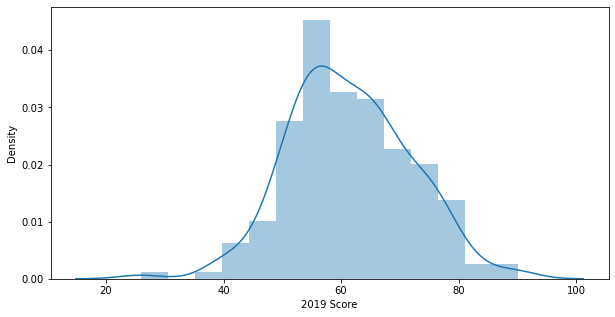

In [14]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['2019 Score'])

<AxesSubplot:xlabel='Property Rights', ylabel='Density'>

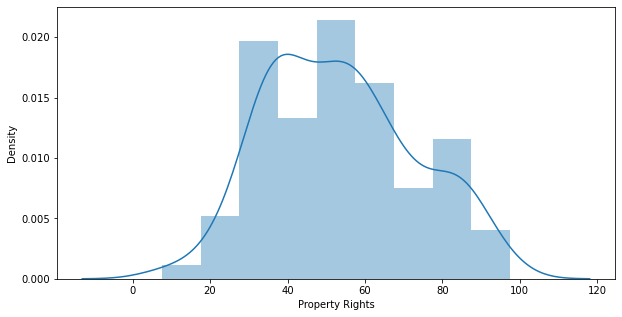

In [15]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Property Rights'])

<AxesSubplot:xlabel='Judical Effectiveness', ylabel='Density'>

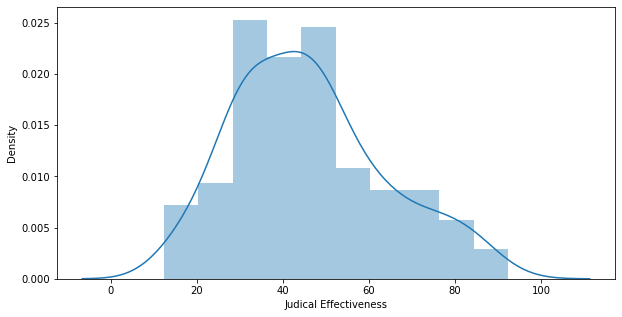

In [16]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Judical Effectiveness'])

<AxesSubplot:xlabel='Government Integrity', ylabel='Density'>

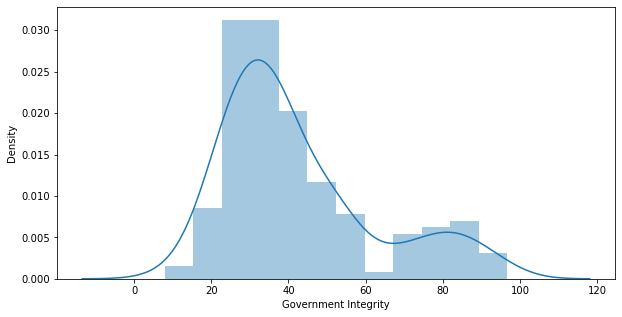

In [17]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Government Integrity'])

<AxesSubplot:xlabel='Tax Burden', ylabel='Density'>

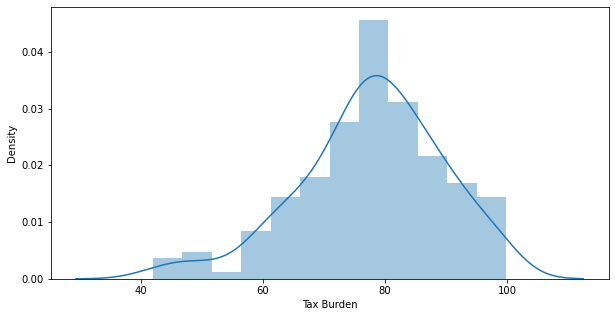

In [18]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Tax Burden'])

<AxesSubplot:xlabel="Gov't Spending", ylabel='Density'>

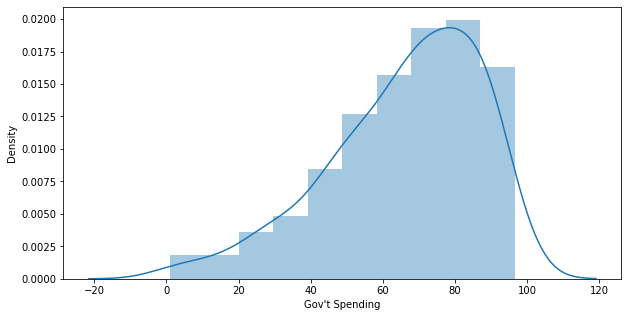

In [19]:
plt.figure(figsize = (10, 5))
sns.distplot(df2["Gov't Spending"])

<AxesSubplot:xlabel='Fiscal Health', ylabel='Density'>

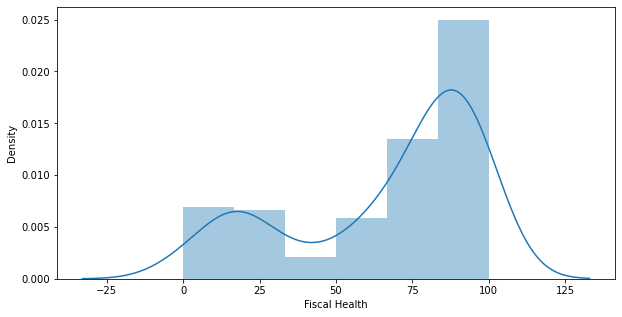

In [20]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Fiscal Health'])

<AxesSubplot:xlabel='Business Freedom', ylabel='Density'>

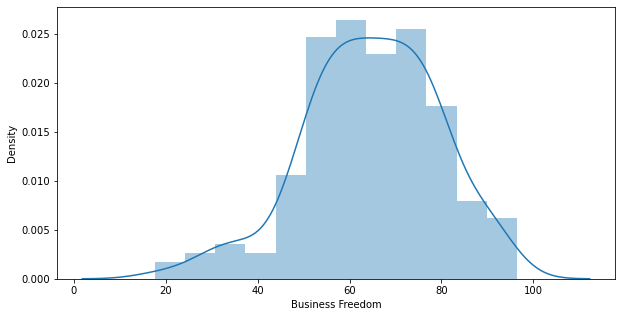

In [21]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Business Freedom'])

<AxesSubplot:xlabel='Labor Freedom', ylabel='Density'>

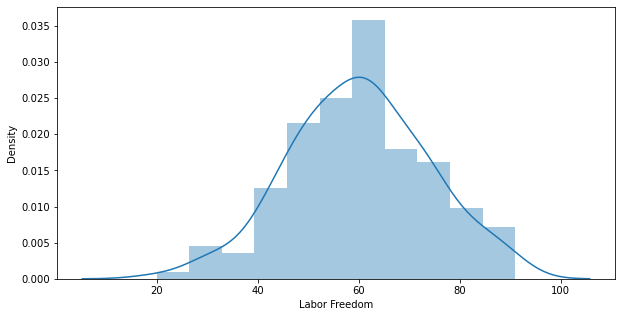

In [22]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Labor Freedom'])

<AxesSubplot:xlabel='Monetary Freedom', ylabel='Density'>

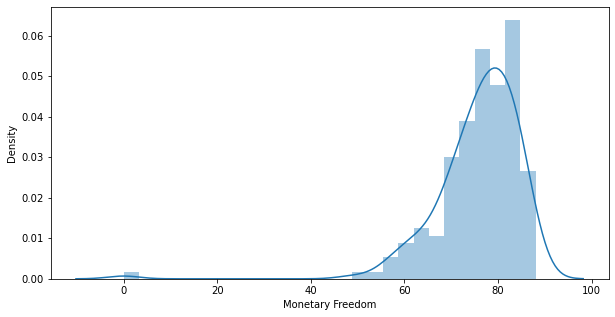

In [23]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Monetary Freedom'])

<AxesSubplot:xlabel='Trade Freedom', ylabel='Density'>

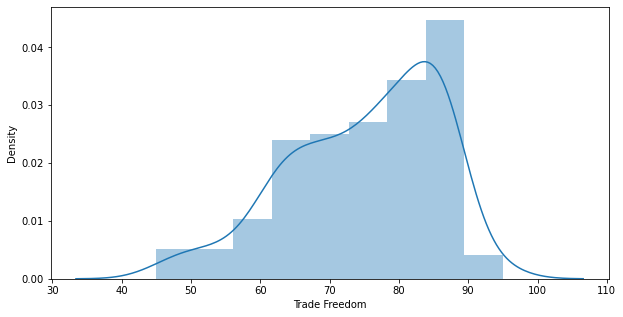

In [24]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Trade Freedom'])

<AxesSubplot:xlabel='Investment Freedom', ylabel='Density'>

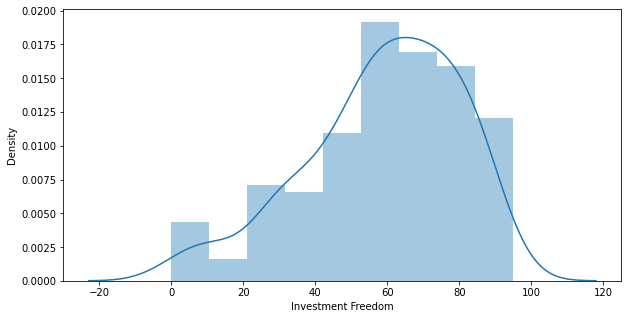

In [25]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Investment Freedom'])

<AxesSubplot:xlabel='Financial Freedom', ylabel='Density'>

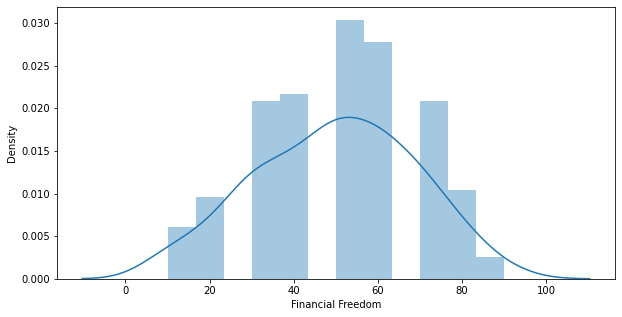

In [26]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Financial Freedom'])

<AxesSubplot:xlabel='Tariff Rate (%)', ylabel='Density'>

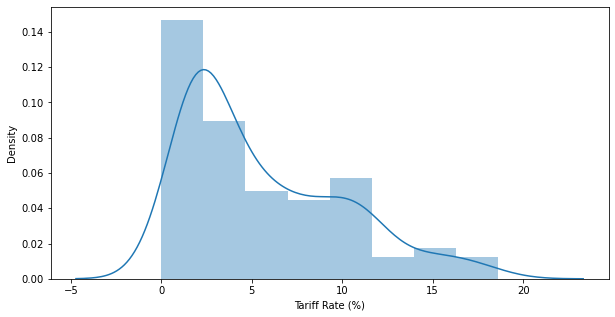

In [27]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Tariff Rate (%)'])

<AxesSubplot:xlabel='Income Tax Rate (%)', ylabel='Density'>

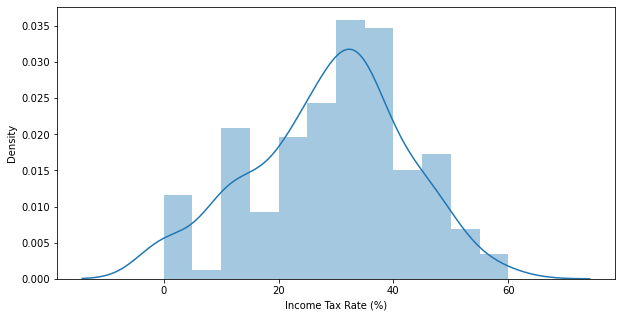

In [28]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Income Tax Rate (%)'])

<AxesSubplot:xlabel='Corporate Tax Rate (%)', ylabel='Density'>

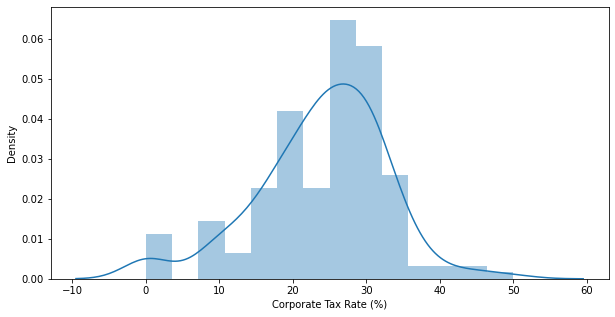

In [29]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Corporate Tax Rate (%)'])

<AxesSubplot:xlabel='Tax Burden % of GDP', ylabel='Density'>

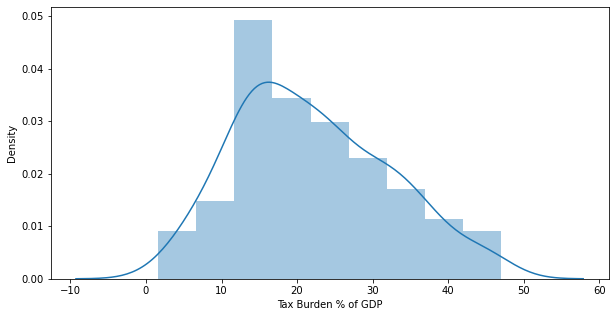

In [30]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Tax Burden % of GDP'])

<AxesSubplot:xlabel="Gov't Expenditure % of GDP", ylabel='Density'>

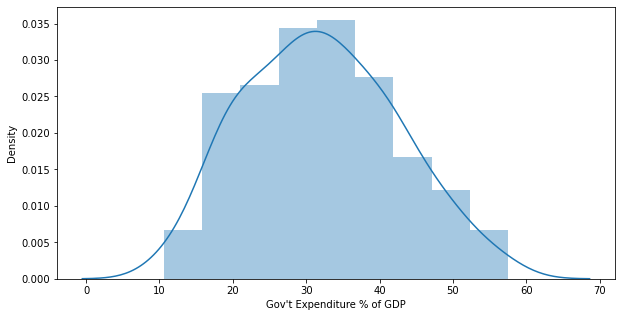

In [31]:
plt.figure(figsize = (10, 5))
sns.distplot(df2["Gov't Expenditure % of GDP"])

<AxesSubplot:xlabel='Population (Millions)', ylabel='Density'>

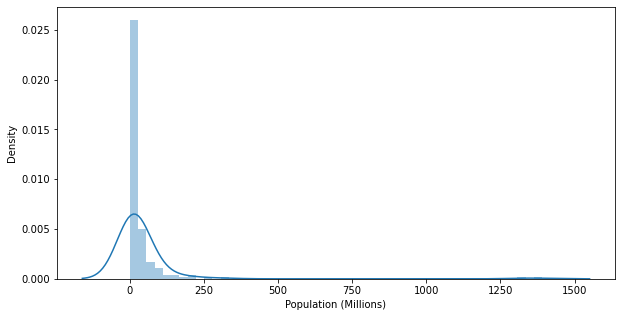

In [32]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Population (Millions)'])

<AxesSubplot:xlabel='GDP Growth Rate (%)', ylabel='Density'>

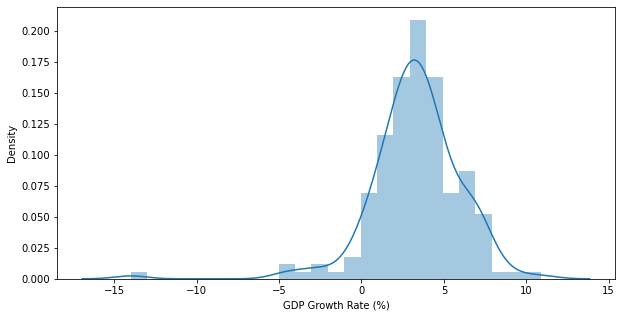

In [33]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['GDP Growth Rate (%)'])

<AxesSubplot:xlabel='GDP', ylabel='Density'>

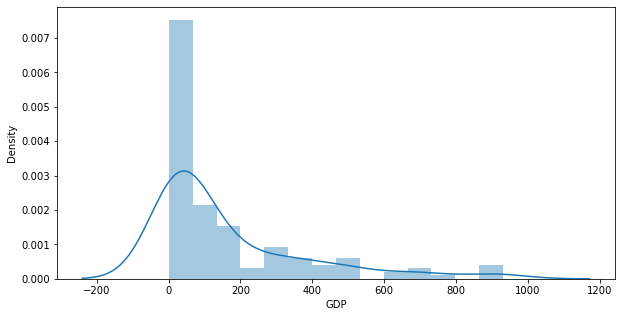

In [34]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['GDP'])

<AxesSubplot:xlabel='5 Year GDP Growth Rate (%)', ylabel='Density'>

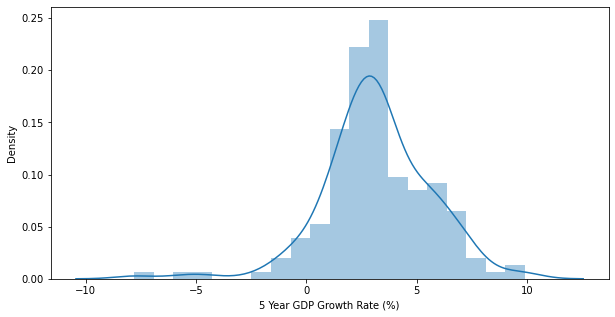

In [35]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['5 Year GDP Growth Rate (%)'])

<AxesSubplot:xlabel='GDPPerCapita', ylabel='Density'>

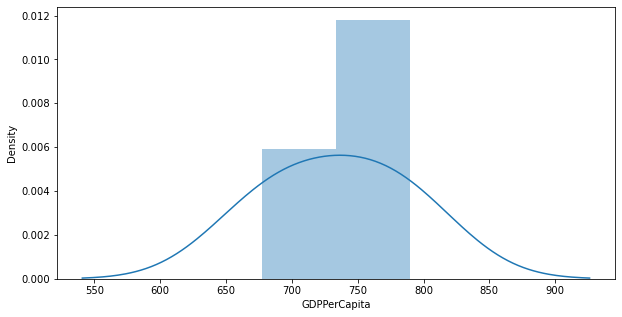

In [36]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['GDPPerCapita'])

<AxesSubplot:xlabel='Unemployment (%)', ylabel='Density'>

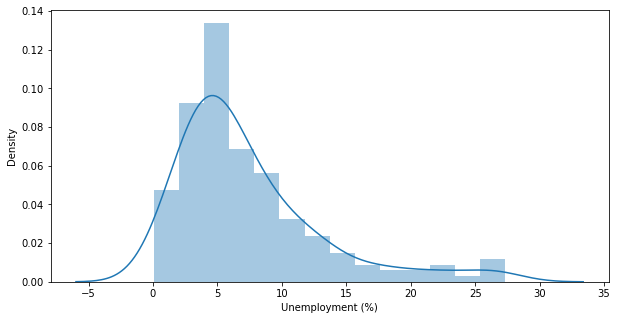

In [37]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Unemployment (%)'])

<AxesSubplot:xlabel='Inflation (%)', ylabel='Density'>

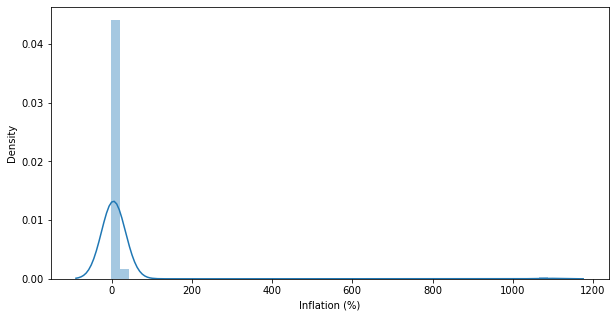

In [38]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Inflation (%)'])

<AxesSubplot:xlabel='FDI Inflow (Millions)', ylabel='Density'>

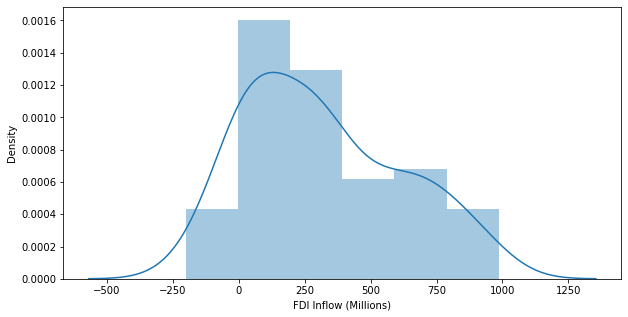

In [39]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['FDI Inflow (Millions)'])

<AxesSubplot:xlabel='Public Debt (% of GDP)', ylabel='Density'>

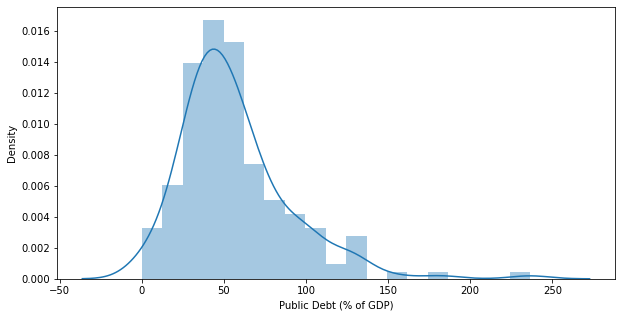

In [40]:
plt.figure(figsize = (10, 5))
sns.distplot(df2['Public Debt (% of GDP)'])

In [41]:
df2.dtypes

World Rank                    float64
Region Rank                   float64
2019 Score                    float64
Property Rights               float64
Judical Effectiveness         float64
Government Integrity          float64
Tax Burden                    float64
Gov't Spending                float64
Fiscal Health                 float64
Business Freedom              float64
Labor Freedom                 float64
Monetary Freedom              float64
Trade Freedom                 float64
Investment Freedom            float64
Financial Freedom             float64
Tariff Rate (%)               float64
Income Tax Rate (%)           float64
Corporate Tax Rate (%)        float64
Tax Burden % of GDP           float64
Gov't Expenditure % of GDP    float64
Population (Millions)         float64
GDP                           float64
GDP Growth Rate (%)           float64
5 Year GDP Growth Rate (%)    float64
GDPPerCapita                  float64
Unemployment (%)              float64
Inflation (%

<AxesSubplot:xlabel='2019 Score'>

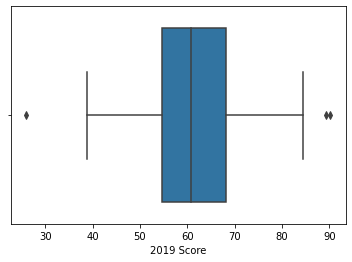

In [42]:
sns.boxplot(df2['2019 Score'])

<AxesSubplot:xlabel='Property Rights'>

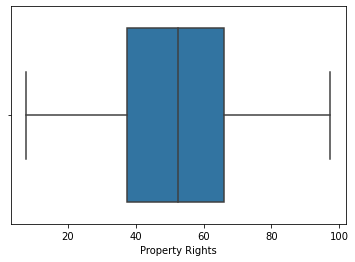

In [43]:
sns.boxplot(df2['Property Rights'])

<AxesSubplot:xlabel='Judical Effectiveness'>

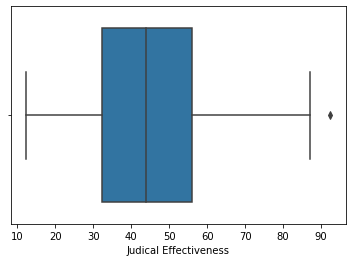

In [44]:
sns.boxplot(df2['Judical Effectiveness'])

<AxesSubplot:xlabel='Government Integrity'>

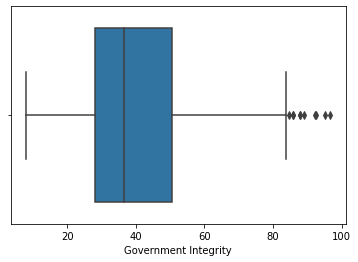

In [45]:
sns.boxplot(df2['Government Integrity'])

<AxesSubplot:xlabel='Tax Burden'>

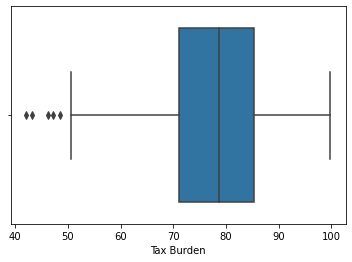

In [46]:
sns.boxplot(df2['Tax Burden'])

<AxesSubplot:xlabel="Gov't Spending">

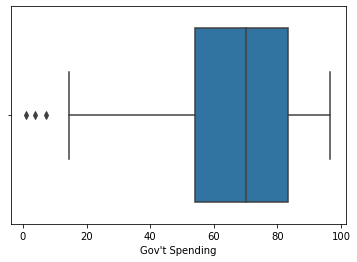

In [47]:
sns.boxplot(df2["Gov't Spending"])

<AxesSubplot:xlabel='Fiscal Health'>

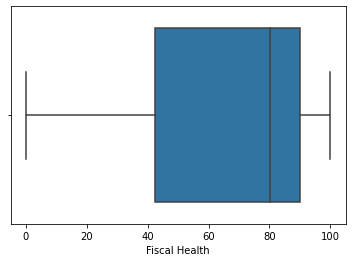

In [48]:
sns.boxplot(df2['Fiscal Health'])

<AxesSubplot:xlabel='Business Freedom'>

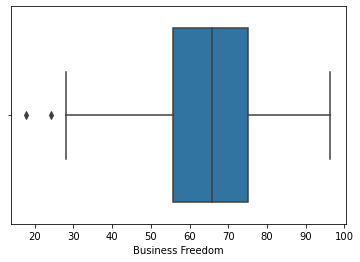

In [49]:
sns.boxplot(df2['Business Freedom'])

<AxesSubplot:xlabel='Labor Freedom'>

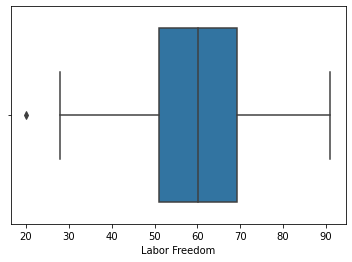

In [50]:
sns.boxplot(df2['Labor Freedom'])

<AxesSubplot:xlabel='Monetary Freedom'>

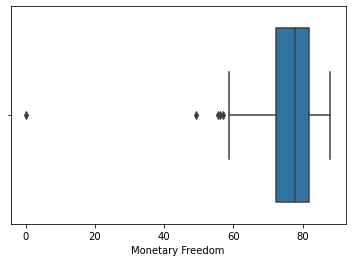

In [51]:
sns.boxplot(df2['Monetary Freedom'])

<AxesSubplot:xlabel='Trade Freedom'>

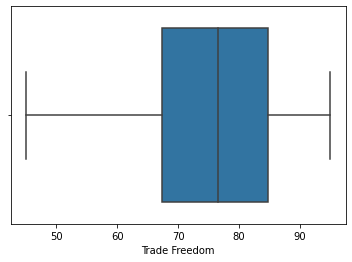

In [52]:
sns.boxplot(df2['Trade Freedom'])

<AxesSubplot:xlabel='Investment Freedom'>

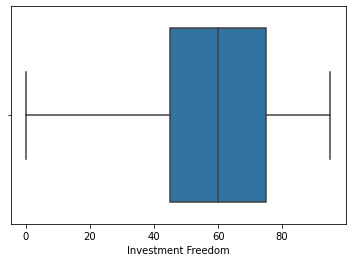

In [53]:
sns.boxplot(df2['Investment Freedom'])

<AxesSubplot:xlabel='Financial Freedom'>

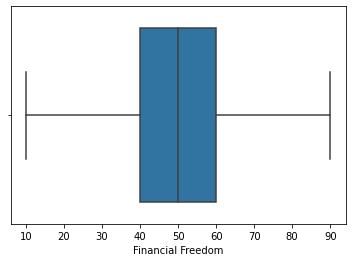

In [54]:
sns.boxplot(df2['Financial Freedom'])

<AxesSubplot:xlabel='Tariff Rate (%)'>

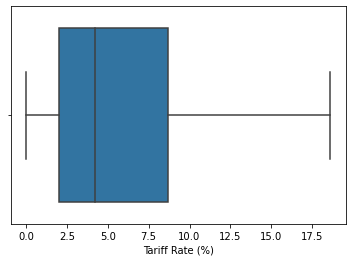

In [55]:
sns.boxplot(df2['Tariff Rate (%)'])

<AxesSubplot:xlabel='Income Tax Rate (%)'>

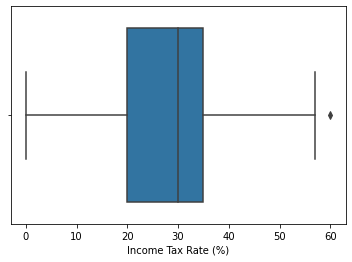

In [56]:
sns.boxplot(df2['Income Tax Rate (%)'])

<AxesSubplot:xlabel='Corporate Tax Rate (%)'>

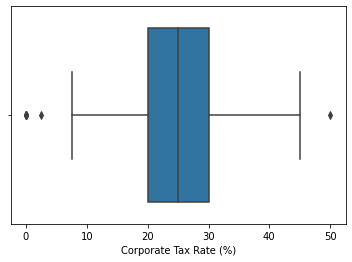

In [57]:
sns.boxplot(df2['Corporate Tax Rate (%)'])

<AxesSubplot:xlabel='Tax Burden % of GDP'>

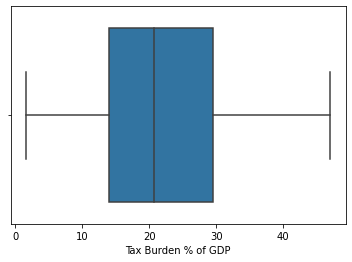

In [58]:
sns.boxplot(df2['Tax Burden % of GDP'])

<AxesSubplot:xlabel="Gov't Expenditure % of GDP">

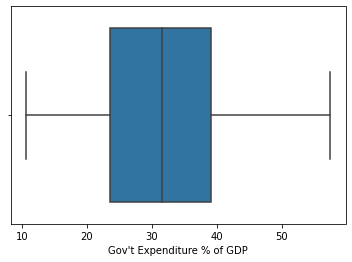

In [59]:
sns.boxplot(df2["Gov't Expenditure % of GDP"])

<AxesSubplot:xlabel='Population (Millions)'>

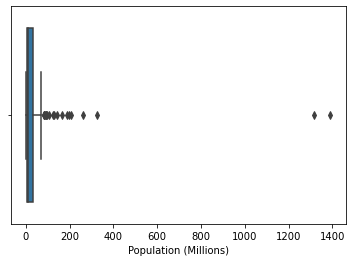

In [60]:
sns.boxplot(df2['Population (Millions)'])

<AxesSubplot:xlabel='GDP'>

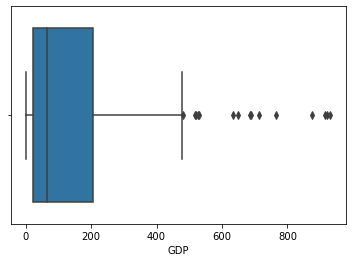

In [61]:
sns.boxplot(df2['GDP'])

<AxesSubplot:xlabel='GDP Growth Rate (%)'>

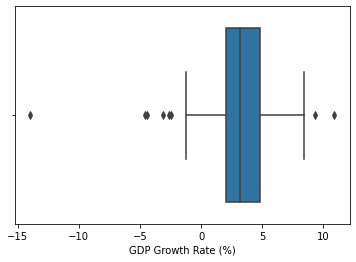

In [62]:
sns.boxplot(df2['GDP Growth Rate (%)'])

<AxesSubplot:xlabel='5 Year GDP Growth Rate (%)'>

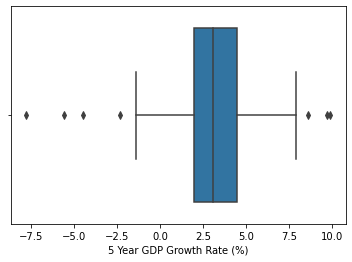

In [63]:
sns.boxplot(df2['5 Year GDP Growth Rate (%)'])

<AxesSubplot:xlabel='GDPPerCapita'>

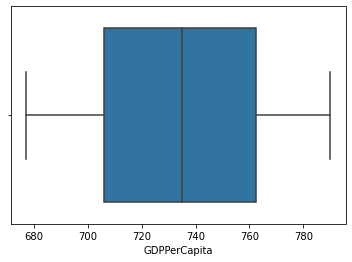

In [64]:
sns.boxplot(df2['GDPPerCapita'])

<AxesSubplot:xlabel='Unemployment (%)'>

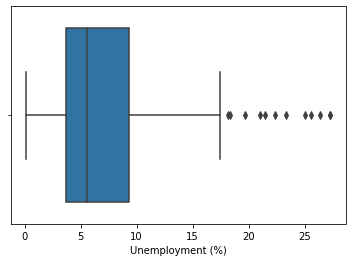

In [65]:
sns.boxplot(df2['Unemployment (%)'])

<AxesSubplot:xlabel='Inflation (%)'>

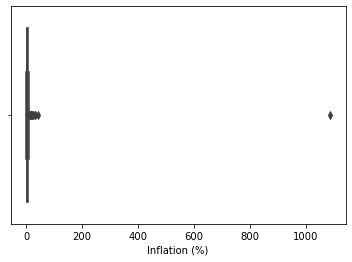

In [66]:
sns.boxplot(df2['Inflation (%)'])

<AxesSubplot:xlabel='FDI Inflow (Millions)'>

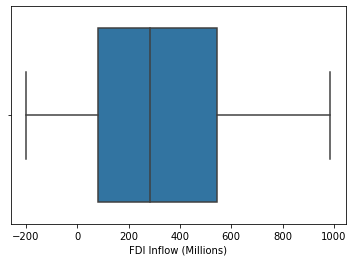

In [67]:
sns.boxplot(df2['FDI Inflow (Millions)'])

<AxesSubplot:xlabel='Public Debt (% of GDP)'>

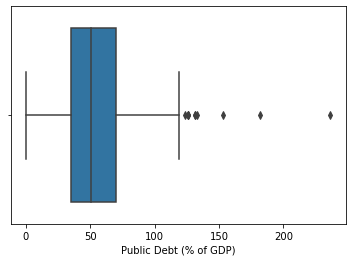

In [68]:
sns.boxplot(df2['Public Debt (% of GDP)'])

In [69]:
df2.skew()

World Rank                     0.000689
Region Rank                    0.265984
2019 Score                     0.070056
Property Rights                0.264739
Judical Effectiveness          0.519221
Government Integrity           1.091971
Tax Burden                    -0.548895
Gov't Spending                -0.853803
Fiscal Health                 -0.869777
Business Freedom              -0.403999
Labor Freedom                 -0.058773
Monetary Freedom              -3.333310
Trade Freedom                 -0.619028
Investment Freedom            -0.688369
Financial Freedom             -0.137122
Tariff Rate (%)                0.946008
Income Tax Rate (%)           -0.282939
Corporate Tax Rate (%)        -0.509019
Tax Burden % of GDP            0.399369
Gov't Expenditure % of GDP     0.206018
Population (Millions)          7.971801
GDP                            1.830647
GDP Growth Rate (%)           -1.525991
5 Year GDP Growth Rate (%)    -0.591753
GDPPerCapita                  -0.079612


#### Bivariate analysis:

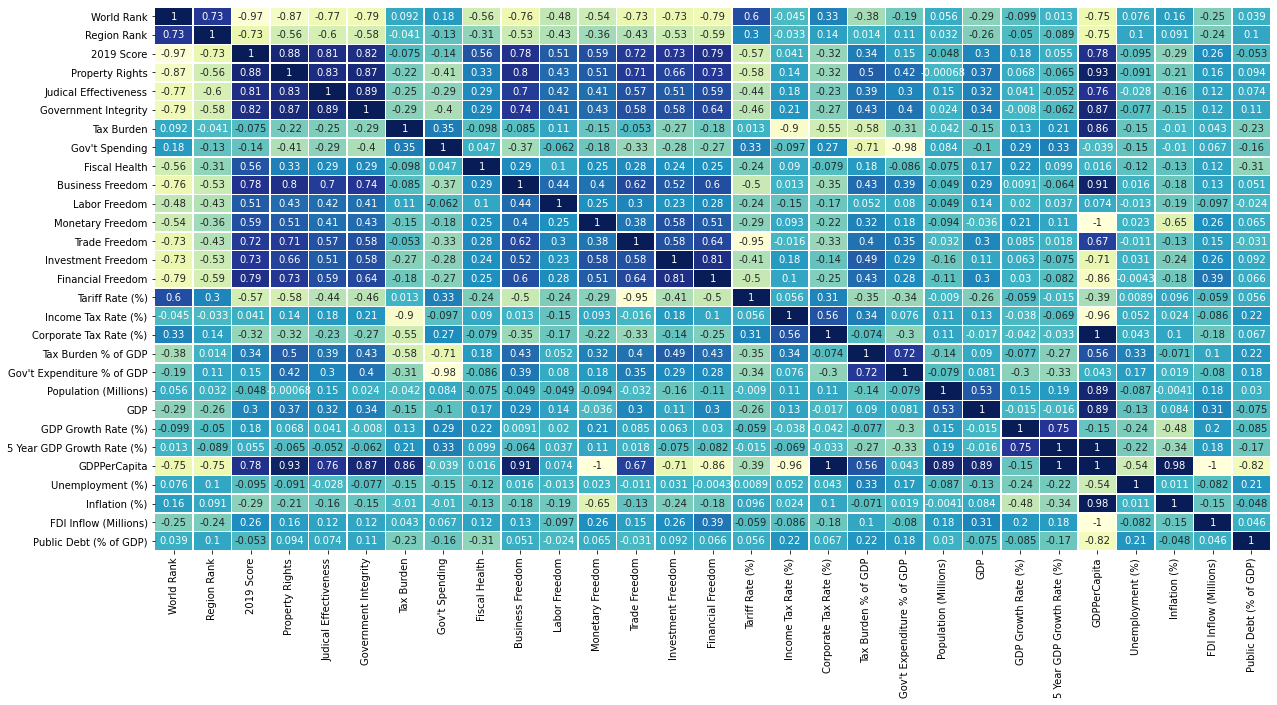

In [70]:
plt.figure(figsize=(20,10))

sns.heatmap(df2.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

plt.show()

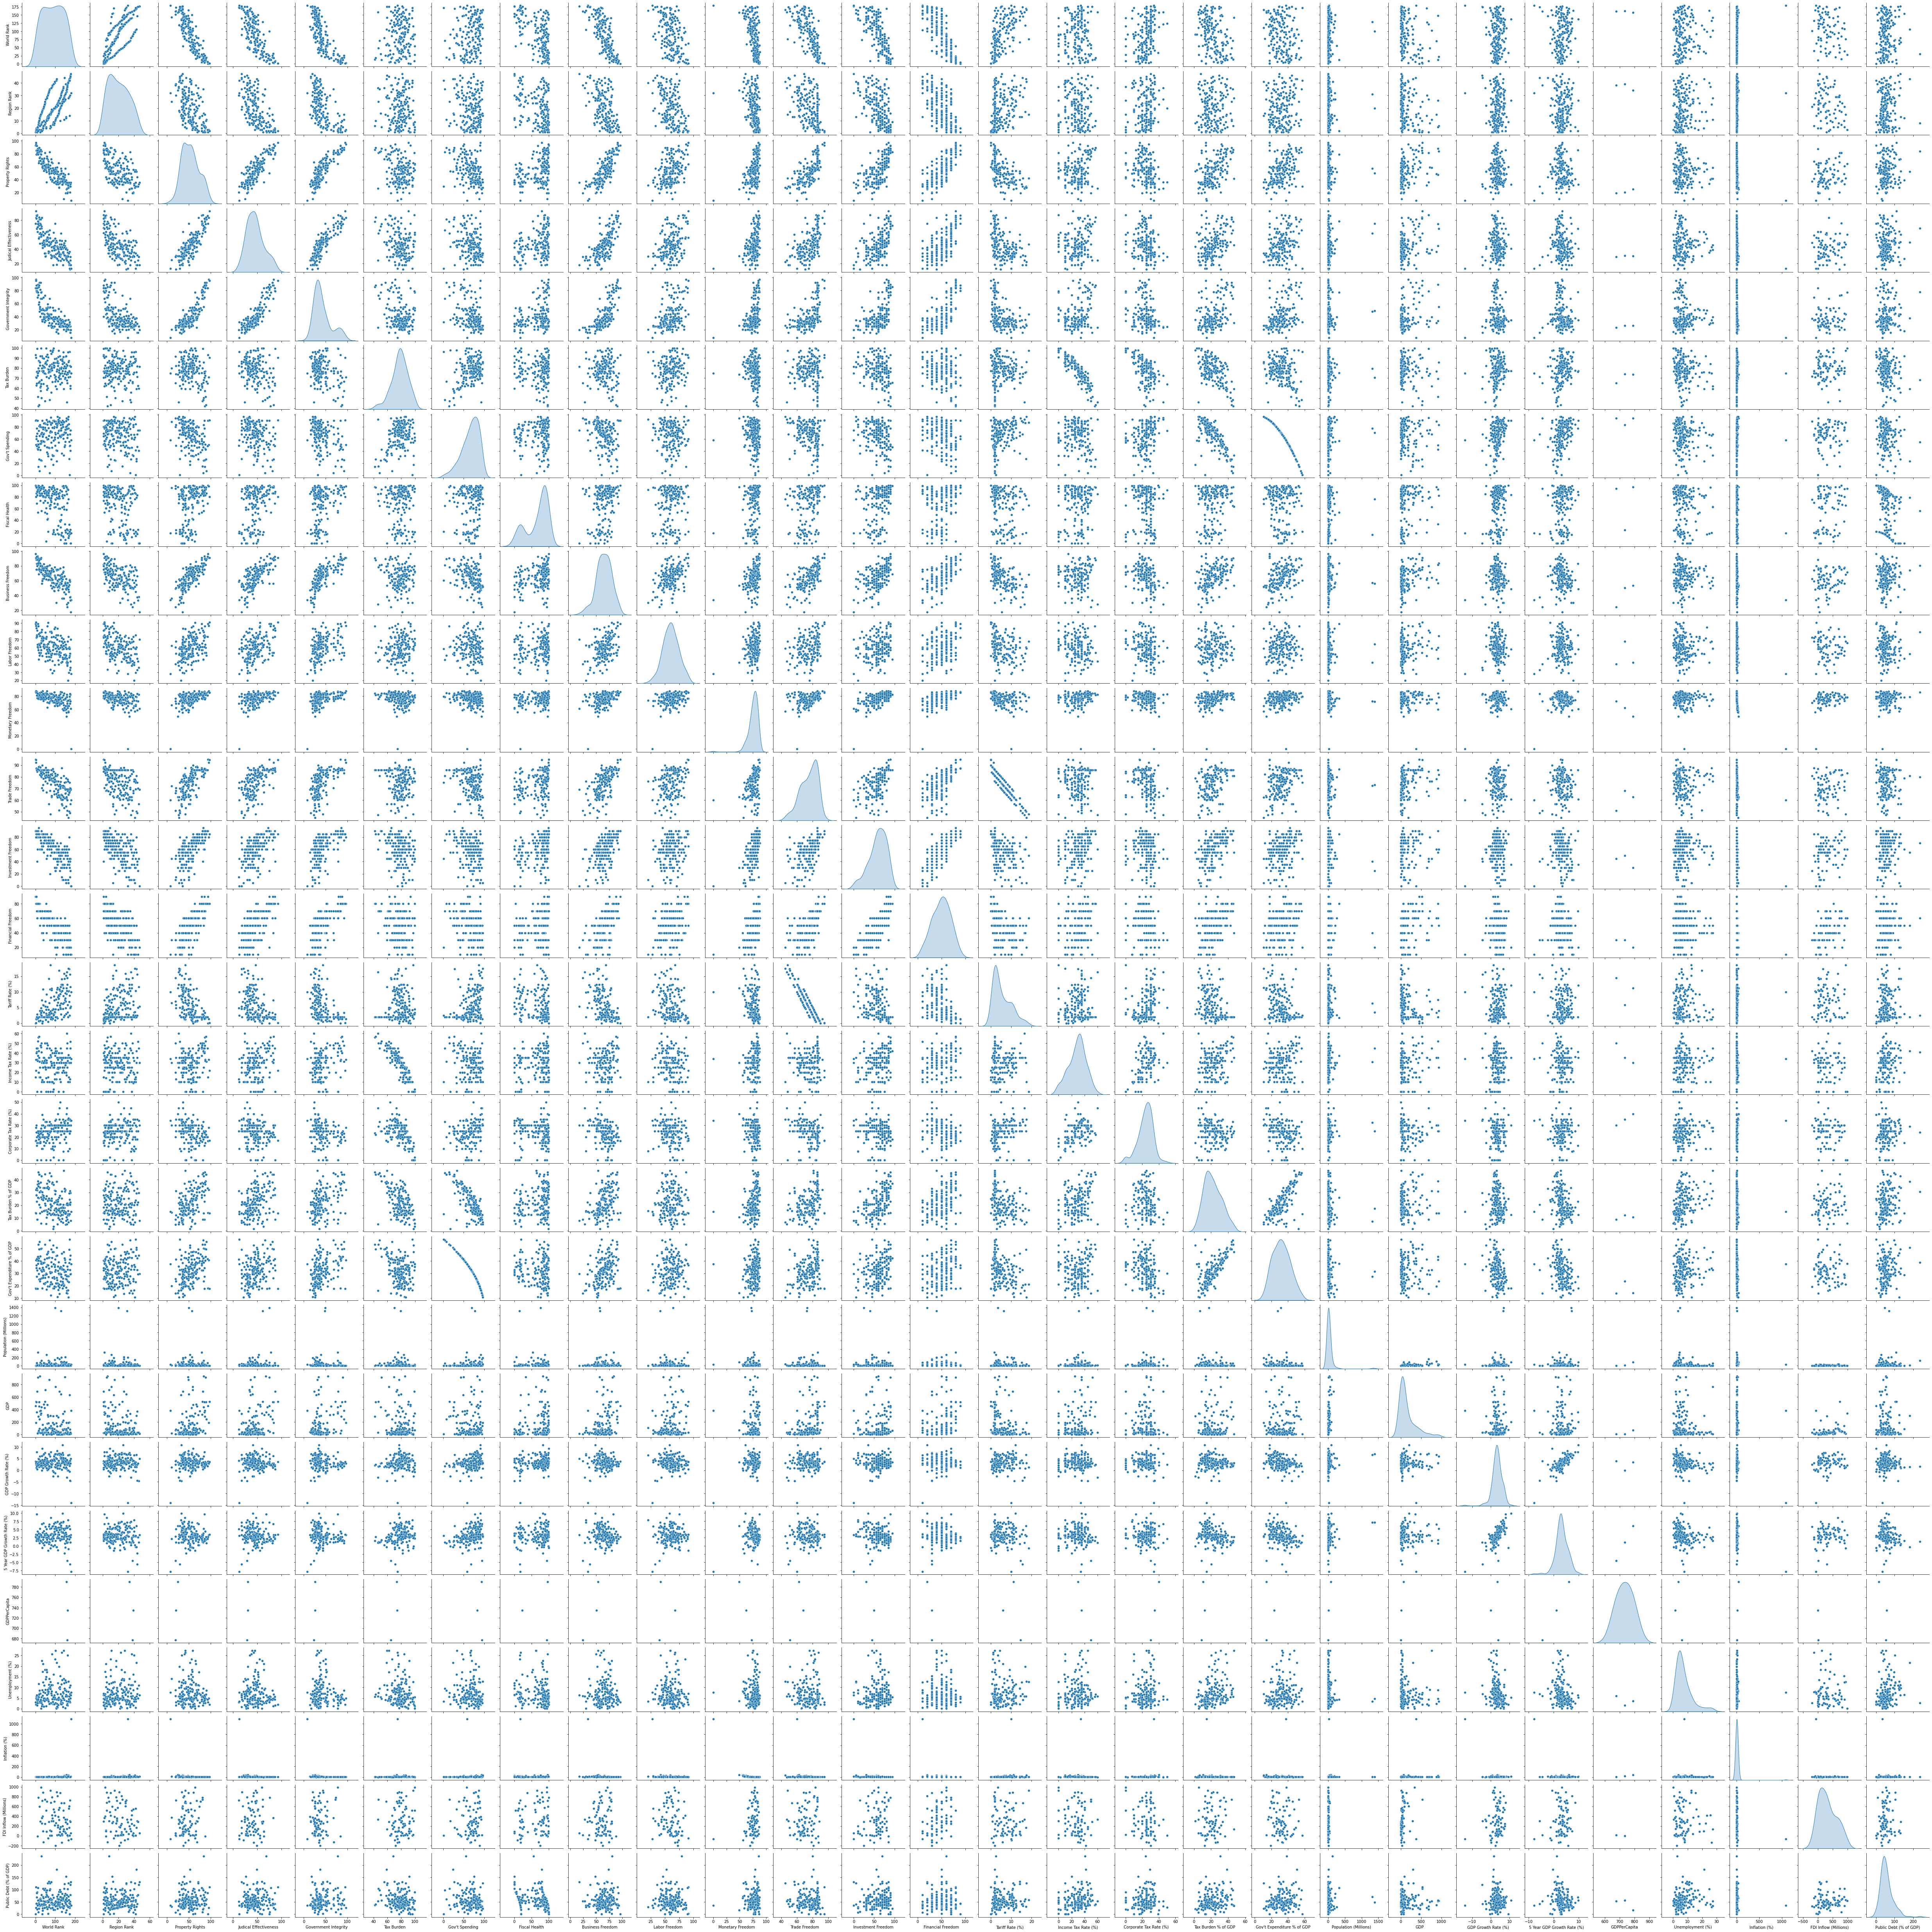

In [71]:
X = df2.drop(['2019 Score'], axis=1)
y = df2[['2019 Score']]
sns.pairplot(X, diag_kind='kde')

#### Principal component analysis:

In [72]:
from scipy.stats import zscore
XScaled=X.apply(zscore)
pd.set_option("display.max_rows", None, "display.max_columns", None)
XScaled.head()

World Rank  Region Rank  Property Rights  Judical Effectiveness  \
0    1.222709     1.492075        -1.771283              -0.934381   
1   -0.719525     0.538690         0.064576              -0.877563   
2    1.591733    -0.494144        -1.145422              -0.559381   
3    1.300398     1.015383        -0.921155              -1.104836   
4    1.145020     0.459241        -0.300510              -0.087789   

   Government Integrity  Tax Burden  Gov't Spending  Fiscal Health  \
0             -0.859921    1.190865        0.683410       1.057424   
1             -0.094849    0.731399        0.377140       0.448782   
2             -0.673687   -0.110957       -0.828800      -1.565920   
3             -1.096490    0.527191        0.702552      -0.280286   
4             -0.442151   -0.715070       -0.790516      -1.100488   

   Business Freedom  Labor Freedom  Monetary Freedom  Trade Freedom  \
0         -1.053944       0.025371          0.107381      -0.835841   
1          0.310799      -0.535102          0.614025       1.183693   
2         -0.212013      -0.738910         -0.082610      -0.706146   
3         -0.612610      -0.091091         -2.140851      -1.280509   
4         -0.565081      -0.957276         -1.634207      -0.465284   

   Investment Freedom  Financial Freedom  Tariff Rate (%)  \
0           -2.276011          -2.101765         0.313119   
1            0.534815           1.078456        -1.029175   
2           -1.339069          -1.041691         0.722632   
3           -1.339069          -0.511654         0.859136   
4           -0.167891           0.548420         0.426872   

   Income Tax Rate (%)  Corporate Tax Rate (%)  Tax Burden % of GDP  \
0            -0.651980               -0.442440            -1.683992   
1            -0.424652               -1.007244             0.281988   
2             0.484660               -0.103558             0.242471   
3            -0.879308                0.687167            -0.142822   
4             0.484660                0.687167             0.864867   

   Gov't Expenditure % of GDP  Population (Millions)  GDP  \
0                   -0.620165              -0.044102  NaN   
1                   -0.243612              -0.262209  NaN   
2                    0.905356              -0.003960  NaN   
3                   -0.649130              -0.092942  NaN   
4                    0.866735               0.013435  NaN   

   GDP Growth Rate (%)  5 Year GDP Growth Rate (%)  GDPPerCapita  \
0            -0.288490                   -0.110439           NaN   
1             0.222272                   -0.273044           NaN   
2            -0.470905                   -0.029137           NaN   
3            -0.945184                   -0.110439           NaN   
4            -0.142558                   -1.004764           NaN   

   Unemployment (%)  Inflation (%)  FDI Inflow (Millions)  \
0          0.259212      -0.071310                    NaN   
1          1.159969      -0.107754                    NaN   
2          0.471155      -0.064021                    NaN   
3          0.153240       0.253049                    NaN   
4          0.241550       0.180159                    NaN   

   Public Debt (% of GDP)  
0               -1.462449  
1                0.430524  
2               -0.914405  
3                0.255742  
4               -0.120482

In [73]:
XScaled1 = XScaled.drop(columns= ['GDP', 'GDPPerCapita', 'FDI Inflow (Millions)'])

In [74]:
covMatrix = np.cov(XScaled1,rowvar=False)
print(covMatrix)

[[ 1.00581395e+00  7.35674795e-01 -8.71248532e-01 -7.79477706e-01
  -7.89813354e-01  9.26621714e-02  1.83004772e-01 -5.62295631e-01
  -7.66142816e-01 -4.83855115e-01 -5.41977321e-01 -7.36980637e-01
  -7.39138302e-01 -7.90808626e-01  6.00476871e-01 -4.56535070e-02
   3.28100070e-01 -3.77974610e-01 -1.94527921e-01  5.58662802e-02
  -9.96355634e-02  1.28404145e-02  7.61946342e-02  1.64394528e-01
   3.96664161e-02]
 [ 7.35674795e-01  1.00581395e+00 -5.59903200e-01 -6.02336065e-01
  -5.85233052e-01 -4.07940557e-02 -1.32029389e-01 -3.12464315e-01
  -5.31781513e-01 -4.31209553e-01 -3.66518610e-01 -4.34250799e-01
  -5.28779714e-01 -5.95348875e-01  3.06395329e-01 -3.28545565e-02
   1.44974211e-01  1.42680206e-02  1.08428656e-01  3.24778613e-02
  -5.02100393e-02 -8.93276155e-02  1.04276188e-01  9.16840521e-02
   1.04527429e-01]
 [-8.71248532e-01 -5.59903200e-01  1.00581395e+00  8.31612367e-01
   8.72038772e-01 -2.24814177e-01 -4.12051974e-01  3.31887894e-01
   7.99796069e-01  4.35262372e-01  5.1

In [75]:
from sklearn.decomposition import PCA
pca = PCA(n_components=25)
pca.fit(XScaled1)

PCA(n_components=25)

In [76]:
print(pca.explained_variance_)

[8.43868496 3.53268329 2.42995474 1.77810129 1.36275424 1.29066707
 0.9905575  0.88674183 0.75166032 0.7140226  0.60951411 0.462762
 0.34994462 0.29948245 0.26544634 0.221454   0.19919637 0.16507744
 0.12263307 0.09994281 0.07822076 0.03695025 0.02712838 0.02153985
 0.01022854]


In [77]:
print(pca.components_)

[[ 3.15749753e-01  2.11584096e-01 -3.21615918e-01 -2.85207217e-01
  -2.99945639e-01  8.93242449e-02  1.65666938e-01 -1.33114416e-01
  -2.84071323e-01 -1.55774296e-01 -2.09124065e-01 -2.75866935e-01
  -2.66720946e-01 -2.82723620e-01  2.32276050e-01 -5.02204119e-02
   1.18813301e-01 -2.06445871e-01 -1.68937354e-01  2.22533952e-02
  -1.45420121e-02  2.77848937e-02 -3.57460259e-03  8.88226083e-02
  -2.53243632e-02]
 [ 1.34183607e-01  2.17752775e-01 -1.85172403e-02 -2.81001856e-02
   7.68748200e-03 -3.49199996e-01 -3.43602097e-01 -1.54577814e-01
  -3.15779879e-02 -1.41113592e-01 -8.97622067e-02 -5.89364922e-02
   8.91948383e-03 -2.90951318e-02  4.50596000e-02  2.53014522e-01
   1.45538178e-01  3.19502724e-01  3.39334836e-01 -4.78686813e-02
  -3.13718000e-01 -3.33238223e-01  2.13534162e-01  1.76030733e-01
   2.08140619e-01]
 [ 2.09252247e-02  7.75628702e-02 -8.79049145e-03 -7.00262638e-02
  -4.73881489e-02  4.28987304e-01 -2.10348004e-01 -1.38890906e-01
   7.76556225e-02  8.31496026e-02 -1.3

In [78]:
print(pca.explained_variance_ratio_)

[0.33559626 0.14049053 0.09663635 0.07071293 0.05419508 0.05132826
 0.03939327 0.03526465 0.02989262 0.02839581 0.02423964 0.01840348
 0.01391687 0.01191005 0.01055648 0.00880696 0.0079218  0.00656493
 0.00487697 0.0039746  0.00311074 0.00146947 0.00107886 0.00085661
 0.00040678]


In [79]:
print(np.cumsum(pca.explained_variance_ratio_))

[0.33559626 0.47608678 0.57272313 0.64343606 0.69763115 0.74895941
 0.78835268 0.82361732 0.85350994 0.88190575 0.90614539 0.92454887
 0.93846575 0.9503758  0.96093228 0.96973924 0.97766103 0.98422596
 0.98910293 0.99307754 0.99618828 0.99765775 0.99873661 0.99959322
 1.        ]


#### With 14 dimensions, reduced from 25 dimensions, we can explain at least 95% of the variance in the data.

In [80]:
pca14 = PCA(n_components=14)
pca14.fit(XScaled1)
print(pca14.components_)
print(pca14.explained_variance_ratio_)
Xpca14 = pca14.transform(XScaled1)

[[ 3.15749753e-01  2.11584096e-01 -3.21615918e-01 -2.85207217e-01
  -2.99945639e-01  8.93242449e-02  1.65666938e-01 -1.33114416e-01
  -2.84071323e-01 -1.55774296e-01 -2.09124065e-01 -2.75866935e-01
  -2.66720946e-01 -2.82723620e-01  2.32276050e-01 -5.02204119e-02
   1.18813301e-01 -2.06445871e-01 -1.68937354e-01  2.22533952e-02
  -1.45420121e-02  2.77848937e-02 -3.57460259e-03  8.88226083e-02
  -2.53243632e-02]
 [ 1.34183607e-01  2.17752775e-01 -1.85172403e-02 -2.81001856e-02
   7.68748200e-03 -3.49199996e-01 -3.43602097e-01 -1.54577814e-01
  -3.15779879e-02 -1.41113592e-01 -8.97622067e-02 -5.89364922e-02
   8.91948383e-03 -2.90951318e-02  4.50596000e-02  2.53014522e-01
   1.45538178e-01  3.19502724e-01  3.39334836e-01 -4.78686813e-02
  -3.13718000e-01 -3.33238223e-01  2.13534162e-01  1.76030733e-01
   2.08140619e-01]
 [ 2.09252247e-02  7.75628702e-02 -8.79049145e-03 -7.00262638e-02
  -4.73881489e-02  4.28987304e-01 -2.10348004e-01 -1.38890906e-01
   7.76556225e-02  8.31496026e-02 -1.3

#### Clustering:

1 4.554065086478901
2 3.9147127153549777
3 3.6730934303802787
4 3.5650292374719
5 3.416470970483809
6 3.3290998881129057
7 3.2038695135036597
8 3.1508476662934393
9 3.029569514527948


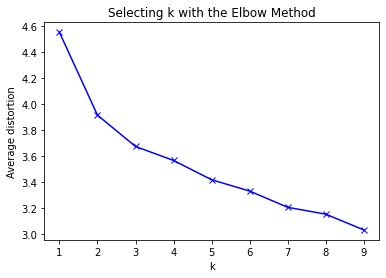

In [81]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(Xpca14)
    prediction=model.predict(Xpca14)
    distortion=sum(np.min(cdist(Xpca14, model.cluster_centers_, 'euclidean'), axis=1)) / Xpca14.shape[0]
                           
    meanDistortions.append(distortion)

    print(k,distortion)
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans.fit(Xpca14)

KMeans(n_clusters=3, n_init=15, random_state=1)

In [83]:
centroids = kmeans.cluster_centers_
centroids

array([[ 2.71001067e+00,  8.44808317e-02, -3.85820899e-01,
        -1.31094139e-01,  1.21209996e-01,  1.73305460e-01,
         1.23458780e-01, -7.06041722e-02, -7.47148327e-02,
        -2.05990943e-02,  7.05897485e-02,  8.64360129e-02,
        -8.78744825e-03,  2.17460243e-02],
       [-9.26197421e-01, -6.99367657e-01,  7.17493639e-01,
         1.36670832e-01, -2.90212638e-01, -2.20027917e-01,
        -2.08943503e-01,  1.92059356e-01,  9.08958411e-02,
        -1.10824849e-01,  1.25392028e-02, -1.26272185e-01,
         3.89766523e-02, -7.04092880e-02],
       [-4.20280479e+00,  1.38300374e+00, -7.24046774e-01,
        -4.13484591e-03,  3.73798870e-01,  9.43213249e-02,
         1.85064938e-01, -2.69698532e-01, -3.17174493e-02,
         2.98092718e-01, -1.92264712e-01,  8.43761300e-02,
        -6.76022382e-02,  1.08481820e-01]])

In [84]:
df3 = pd.DataFrame(Xpca14)

In [85]:
df4 = pd.DataFrame(centroids, columns = df3.columns)

In [86]:
df4

0         1         2         3         4         5         6   \
0  2.710011  0.084481 -0.385821 -0.131094  0.121210  0.173305  0.123459   
1 -0.926197 -0.699368  0.717494  0.136671 -0.290213 -0.220028 -0.208944   
2 -4.202805  1.383004 -0.724047 -0.004135  0.373799  0.094321  0.185065   

         7         8         9         10        11        12        13  
0 -0.070604 -0.074715 -0.020599  0.070590  0.086436 -0.008787  0.021746  
1  0.192059  0.090896 -0.110825  0.012539 -0.126272  0.038977 -0.070409  
2 -0.269699 -0.031717  0.298093 -0.192265  0.084376 -0.067602  0.108482

In [87]:
df5 = df3[:]  

In [88]:
df5['KmeansLabel'] = kmeans.labels_

In [89]:
df5.head()

0         1         2         3         4         5         6  \
0  4.114791 -1.258441  1.201257 -0.229106  0.419286 -0.921021  0.975667   
1 -1.090341 -0.437501  0.992555 -0.766014 -0.647999 -0.990403 -1.891143   
2  2.178275  1.463124  0.550015 -0.691348  0.164998  0.274203  0.684416   
3  3.746033  0.474488  0.772630  0.650198 -0.125623  0.206351  0.003349   
4  1.158281  2.508731 -0.007370 -0.027842  0.510102 -0.047137 -0.102306   

          7         8         9        10        11        12        13  \
0  1.686905  0.206395 -0.756573 -1.295964  0.728634 -0.687573  0.330318   
1  0.018374  0.781973  0.233866 -0.564086 -0.298045  0.036930  0.169261   
2  0.336641 -0.114445 -0.748308  1.280539  1.441087 -0.370298 -0.685009   
3  0.452266 -0.291232  0.521786 -0.203707 -0.564603  0.798209 -0.288690   
4 -0.515133 -0.011440 -0.034137  0.977618 -0.070564  1.071813  0.253692   

   KmeansLabel  
0            0  
1            1  
2            0  
3            0  
4            0

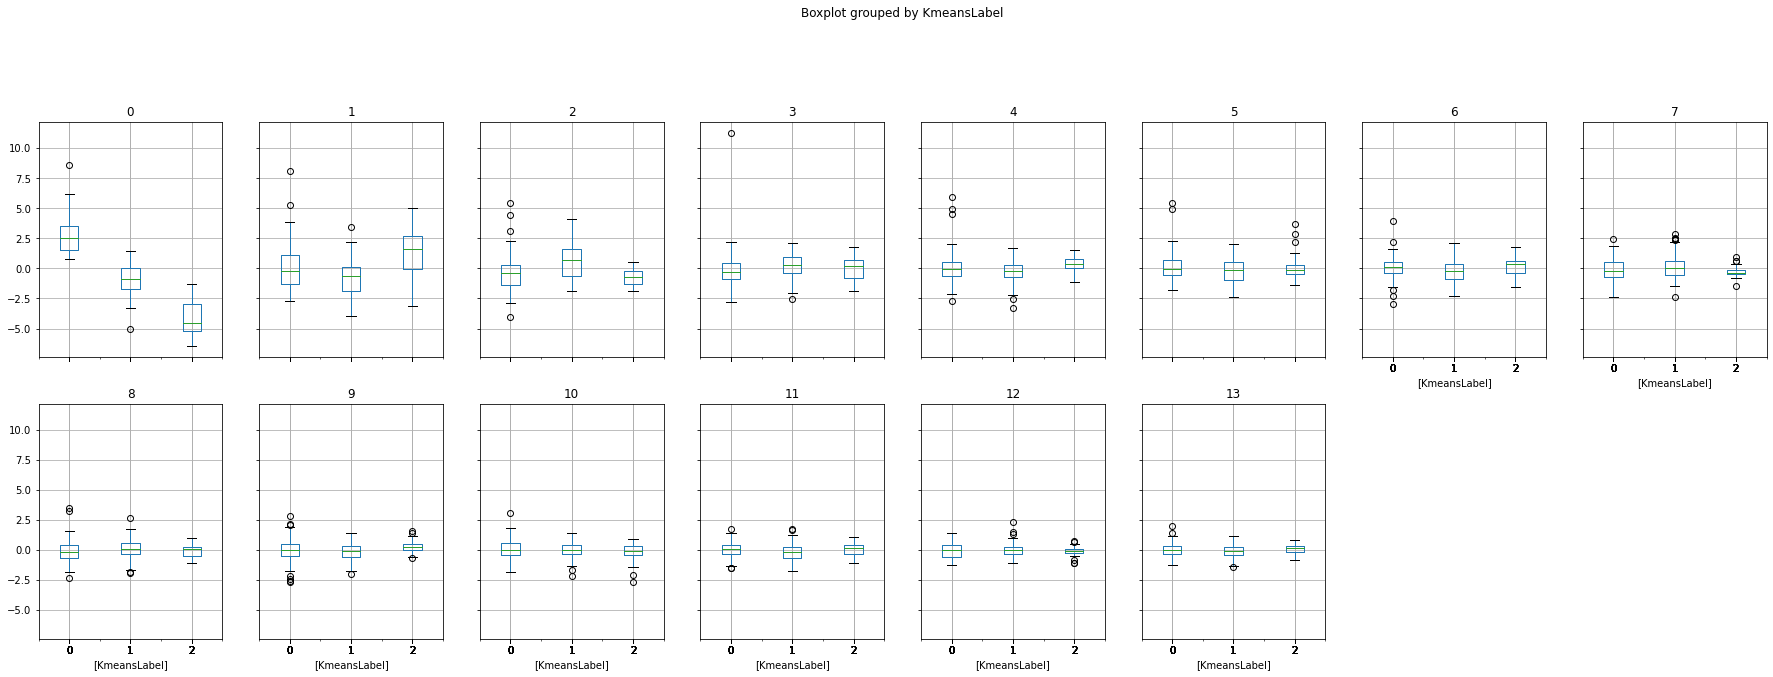

In [91]:
df5.boxplot(by = 'KmeansLabel',  layout=(4,8), figsize=(30, 20))
plt.show()